In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

In [3]:
df=pd.read_csv("dataset_falcon9.csv")
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
 17  Class           90 non-null     int64

In [5]:
df.describe()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Latitude,Class
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,45.500000,6104.959412,1.788889,3.500000,1.655556,-86.366477,29.449963,0.666667
std,26.124701,4694.671720,1.213172,1.595288,1.710254,14.149518,2.141306,0.474045
min,1.000000,350.000000,1.000000,1.000000,0.000000,-120.610829,28.561857,0.000000
25%,23.250000,2510.750000,1.000000,2.000000,0.000000,-80.603956,28.561857,0.000000
50%,45.500000,4701.500000,1.000000,4.000000,1.000000,-80.577366,28.561857,1.000000
75%,67.750000,8912.750000,2.000000,5.000000,3.000000,-80.577366,28.608058,1.000000
max,90.000000,15600.000000,6.000000,5.000000,5.000000,-80.577366,34.632093,1.000000


In [6]:
df.shape

(90, 18)

In [7]:
df["Date"]

0     2010-06-04
1     2012-05-22
2     2013-03-01
3     2013-09-29
4     2013-12-03
         ...    
85    2020-09-03
86    2020-10-06
87    2020-10-18
88    2020-10-24
89    2020-11-05
Name: Date, Length: 90, dtype: object

In [8]:
df["BoosterVersion"]

0     Falcon 9
1     Falcon 9
2     Falcon 9
3     Falcon 9
4     Falcon 9
        ...   
85    Falcon 9
86    Falcon 9
87    Falcon 9
88    Falcon 9
89    Falcon 9
Name: BoosterVersion, Length: 90, dtype: object

In [9]:
set(df["BoosterVersion"])

{'Falcon 9'}

In [10]:
df["PayloadMass"]

0      6104.959412
1       525.000000
2       677.000000
3       500.000000
4      3170.000000
          ...     
85    15400.000000
86    15400.000000
87    15400.000000
88    15400.000000
89     3681.000000
Name: PayloadMass, Length: 90, dtype: float64

array([[<AxesSubplot:title={'center':'FlightNumber'}>,
        <AxesSubplot:title={'center':'PayloadMass'}>,
        <AxesSubplot:title={'center':'Flights'}>],
       [<AxesSubplot:title={'center':'Block'}>,
        <AxesSubplot:title={'center':'ReusedCount'}>,
        <AxesSubplot:title={'center':'Longitude'}>],
       [<AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Class'}>, <AxesSubplot:>]],
      dtype=object)

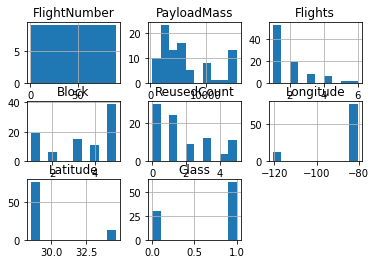

In [11]:
df.hist()

<AxesSubplot:>

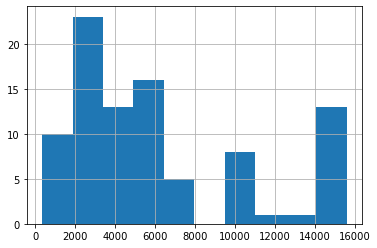

In [12]:
df['PayloadMass'].hist()

In [13]:
df["Orbit"]

0      LEO
1      LEO
2      ISS
3       PO
4      GTO
      ... 
85    VLEO
86    VLEO
87    VLEO
88    VLEO
89     MEO
Name: Orbit, Length: 90, dtype: object

In [14]:
set(df["Orbit"])

{'ES-L1', 'GEO', 'GTO', 'HEO', 'ISS', 'LEO', 'MEO', 'PO', 'SO', 'SSO', 'VLEO'}

In [15]:
len(set(df["Orbit"]))

11

In [16]:
df["Orbit"].value_counts()

GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: Orbit, dtype: int64

<AxesSubplot:>

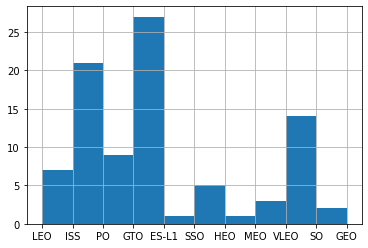

In [17]:
df["Orbit"].hist()

In [18]:
df_success=df[df["Class"]==1]

df_fail=df[df["Class"]!=1]

In [19]:
df_success.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 6 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    60 non-null     int64  
 1   Date            60 non-null     object 
 2   BoosterVersion  60 non-null     object 
 3   PayloadMass     60 non-null     float64
 4   Orbit           60 non-null     object 
 5   LaunchSite      60 non-null     object 
 6   Outcome         60 non-null     object 
 7   Flights         60 non-null     int64  
 8   GridFins        60 non-null     bool   
 9   Reused          60 non-null     bool   
 10  Legs            60 non-null     bool   
 11  LandingPad      55 non-null     object 
 12  Block           60 non-null     float64
 13  ReusedCount     60 non-null     int64  
 14  Serial          60 non-null     object 
 15  Longitude       60 non-null     float64
 16  Latitude        60 non-null     float64
 17  Class           60 non-null     int64

In [20]:
df_success["Orbit"].value_counts()

GTO      14
ISS      13
VLEO     12
PO        6
LEO       5
SSO       5
MEO       2
ES-L1     1
HEO       1
GEO       1
Name: Orbit, dtype: int64

In [21]:
df_fail["Orbit"].value_counts()

GTO     13
ISS      8
PO       3
LEO      2
VLEO     2
MEO      1
SO       1
Name: Orbit, dtype: int64

In [22]:
df["LaunchSite"].value_counts()

CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: LaunchSite, dtype: int64

In [23]:
df["Outcome"].value_counts()

True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: Outcome, dtype: int64

In [24]:
df_success["Outcome"].value_counts()

True ASDS     41
True RTLS     14
True Ocean     5
Name: Outcome, dtype: int64

In [25]:
df_fail["Outcome"].value_counts()

None None      19
False ASDS      6
False Ocean     2
None ASDS       2
False RTLS      1
Name: Outcome, dtype: int64

In [26]:
df['GridFins'].value_counts()

True     70
False    20
Name: GridFins, dtype: int64

In [27]:
df['Reused'].value_counts()

False    53
True     37
Name: Reused, dtype: int64

In [28]:
df['Legs'].value_counts()

True     71
False    19
Name: Legs, dtype: int64

In [29]:
df['LandingPad'].value_counts()

5e9e3032383ecb6bb234e7ca    35
5e9e3032383ecb267a34e7c7    13
5e9e3033383ecbb9e534e7cc    12
5e9e3032383ecb761634e7cb     2
5e9e3032383ecb554034e7c9     2
Name: LandingPad, dtype: int64

In [30]:
df['Block'].value_counts()

5.0    39
1.0    19
3.0    15
4.0    11
2.0     6
Name: Block, dtype: int64

In [31]:
df['ReusedCount'].value_counts()

0    30
1    24
3    12
5    11
2     9
4     4
Name: ReusedCount, dtype: int64

In [32]:
df['ReusedCount'].value_counts().head()

0    30
1    24
3    12
5    11
2     9
Name: ReusedCount, dtype: int64

In [33]:
df['Longitude'].value_counts()

-80.577366     55
-80.603956     22
-120.610829    13
Name: Longitude, dtype: int64

In [34]:
df['Latitude'].value_counts()

28.561857    55
28.608058    22
34.632093    13
Name: Latitude, dtype: int64

In [35]:
df['LaunchSite'].value_counts()

CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: LaunchSite, dtype: int64

In [36]:
df=df.drop(['FlightNumber','Date',"BoosterVersion","Longitude","Latitude"], axis=1)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PayloadMass  90 non-null     float64
 1   Orbit        90 non-null     object 
 2   LaunchSite   90 non-null     object 
 3   Outcome      90 non-null     object 
 4   Flights      90 non-null     int64  
 5   GridFins     90 non-null     bool   
 6   Reused       90 non-null     bool   
 7   Legs         90 non-null     bool   
 8   LandingPad   64 non-null     object 
 9   Block        90 non-null     float64
 10  ReusedCount  90 non-null     int64  
 11  Serial       90 non-null     object 
 12  Class        90 non-null     int64  
dtypes: bool(3), float64(2), int64(3), object(5)
memory usage: 7.4+ KB


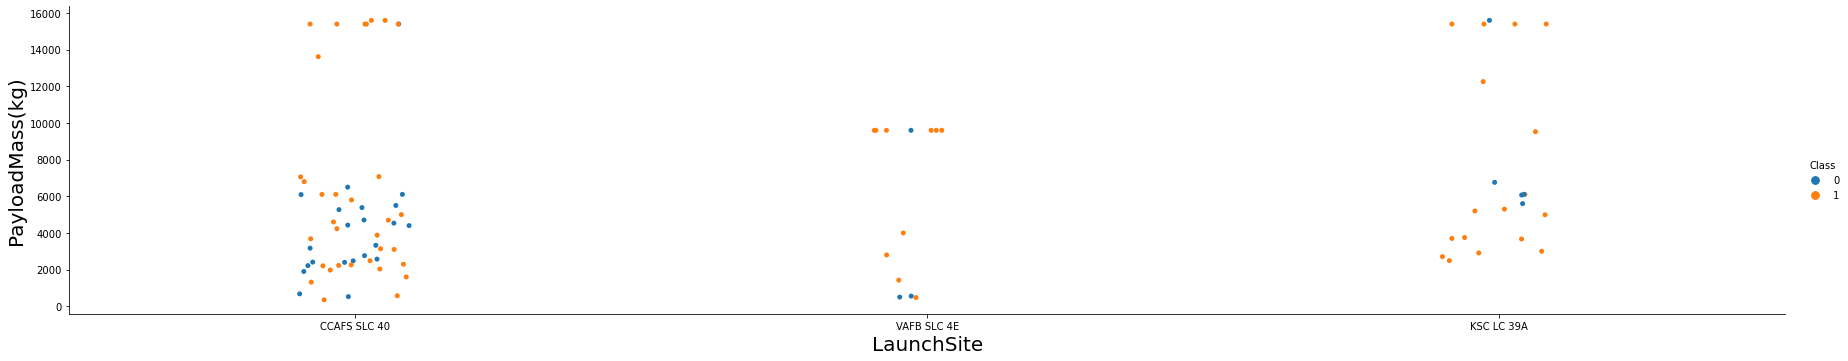

In [38]:
sns.catplot(y="PayloadMass", x="LaunchSite", hue="Class", data=df, aspect=5)
plt.xlabel("LaunchSite", fontsize=20)
plt.ylabel("PayloadMass(kg)", fontsize=20)
plt.show()

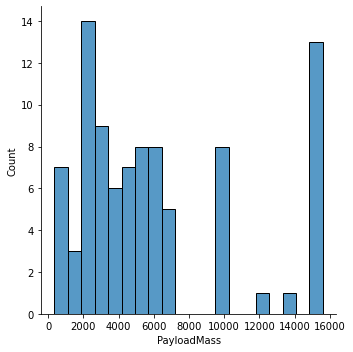

In [39]:
sns.displot(df["PayloadMass"], bins=20)

<AxesSubplot:xlabel='LaunchSite', ylabel='count'>

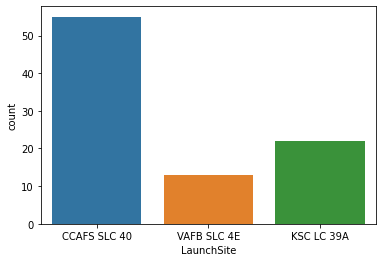

In [40]:
sns.countplot(x="LaunchSite", data=df)

In [41]:
df.columns

Index(['PayloadMass', 'Orbit', 'LaunchSite', 'Outcome', 'Flights', 'GridFins',
       'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial',
       'Class'],
      dtype='object')

In [42]:
df_dummy = pd.get_dummies(df[["Orbit","LaunchSite","Outcome","LandingPad", "Serial"]])

In [43]:
df_dummy

,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
86,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
87,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
88,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [44]:
df["GridFins"]=df["GridFins"].astype(int)
df["Reused"]=df["Reused"].astype(int)
df["Legs"]=df["Legs"].astype(int)

In [45]:
df=df.drop(["Orbit", "LaunchSite", "Outcome", "LandingPad", "Serial"], axis=1)

In [46]:
df=pd.concat([df, df_dummy], axis=1)

In [47]:
df

,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Class,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,6104.959412,1,0,0,0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,525.000000,1,0,0,0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,677.000000,1,0,0,0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,500.000000,1,0,0,0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3170.000000,1,0,0,0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,15400.000000,2,1,1,1,5.0,2,1,0,0,...,0,0,0,0,0,0,0,0,1,0
86,15400.000000,3,1,1,1,5.0,2,1,0,0,...,0,0,0,0,0,0,1,0,0,0
87,15400.000000,6,1,1,1,5.0,5,1,0,0,...,0,0,0,1,0,0,0,0,0,0
88,15400.000000,3,1,1,1,5.0,2,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [48]:
def plot_confusion_matrix(y, y_predict):
    
    cm = confusion_matrix(y, y_predict)
    ax =plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax);
    ax.set_xlabel("Predicted labels")
    ax.set_ylabel("True lablels")
    ax.set_title("Confusion Matrix");
    ax.xaxis.set_ticklabels(["did not land", "land"]); 
    ax.yaxis.set_ticklabels(['did not land', 'landed'])

In [49]:
X = df.drop("Class", axis=1)
Y = df["Class"]

In [50]:
X

,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,6104.959412,1,0,0,0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,525.000000,1,0,0,0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,677.000000,1,0,0,0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,500.000000,1,0,0,0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3170.000000,1,0,0,0,1.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,15400.000000,2,1,1,1,5.0,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
86,15400.000000,3,1,1,1,5.0,2,0,0,0,...,0,0,0,0,0,0,1,0,0,0
87,15400.000000,6,1,1,1,5.0,5,0,0,0,...,0,0,0,1,0,0,0,0,0,0
88,15400.000000,3,1,1,1,5.0,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [51]:
transform = preprocessing.StandardScaler()
x_scaled = transform.fit_transform(X)
x_scaled

array([[-1.94814463e-16, -6.53912840e-01, -1.87082869e+00, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       [-1.19523159e+00, -6.53912840e-01, -1.87082869e+00, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       [-1.16267307e+00, -6.53912840e-01, -1.87082869e+00, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       ...,
       [ 1.99100483e+00,  3.49060516e+00,  5.34522484e-01, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       [ 1.99100483e+00,  1.00389436e+00,  5.34522484e-01, ...,
        -2.15665546e-01,  5.38516481e+00, -1.05999788e-01],
       [-5.19213966e-01, -6.53912840e-01,  5.34522484e-01, ...,
        -2.15665546e-01, -1.85695338e-01,  9.43398113e+00]])

In [52]:
col=X.columns
X = pd.DataFrame(x_scaled, columns=col)
X

,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,-1.948145e-16,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.973440,-0.106,-0.106,-0.654654,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
1,-1.195232e+00,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.973440,-0.106,-0.106,-0.654654,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
2,-1.162673e+00,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.973440,-0.106,-0.106,-0.654654,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
3,-1.200587e+00,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.973440,-0.106,-0.106,-0.654654,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
4,-6.286706e-01,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.973440,-0.106,-0.106,1.527525,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1.991005e+00,0.174991,0.534522,1.196843,0.517306,0.945537,0.202528,-0.106,-0.106,-0.654654,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,5.385165,-0.106000
86,1.991005e+00,1.003894,0.534522,1.196843,0.517306,0.945537,0.202528,-0.106,-0.106,-0.654654,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,5.385165,-0.215666,-0.185695,-0.106000
87,1.991005e+00,3.490605,0.534522,1.196843,0.517306,0.945537,1.966480,-0.106,-0.106,-0.654654,...,-0.215666,-0.267261,-0.106,4.123106,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
88,1.991005e+00,1.003894,0.534522,1.196843,0.517306,0.945537,0.202528,-0.106,-0.106,-0.654654,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,5.385165,-0.106000


In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=101)

In [54]:
## Logistic Regression

In [55]:
logreg=LogisticRegression()
parameters={"C": [0.01, 0.1, 1], "penalty":["l2"], "solver": ["lbfgs"]}
logreg_cv = GridSearchCV(logreg, parameters, cv=4)
logreg_cv.fit(X_train,Y_train )

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [56]:
print("best parameters:", logreg_cv.best_params_)
print("accuracy:", logreg_cv.best_score_)

best parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy: 0.875


In [57]:
accu=[]
methods=[]
accu.append(logreg_cv.score(X_test, Y_test))
methods.append("logistic regression")
logreg_cv.score(X_test, Y_test)

0.8888888888888888

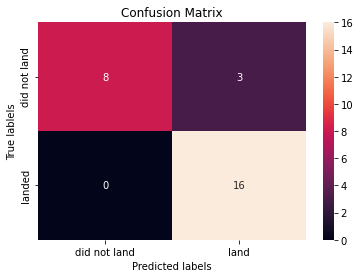

In [58]:
y_pred=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test, y_pred)

In [59]:
## Support Vector Machine


In [60]:
svm = SVC()

parameters = {"kernel":("linear", "rbf", "poly", "sigmoid"), "C": (0.5, 1, 1.5)}

svm_cv = GridSearchCV(svm, parameters, cv = 10)

svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': (0.5, 1, 1.5),
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')})

In [61]:
print("best parameters:", svm_cv.best_params_)
print("accuracy:", svm_cv.best_score_)

best parameters: {'C': 1, 'kernel': 'sigmoid'}
accuracy: 0.9380952380952381


In [62]:
accu.append(svm_cv.score(X_test, Y_test))
methods.append("support vector machine")
svm_cv.score(X_test, Y_test)

0.8888888888888888

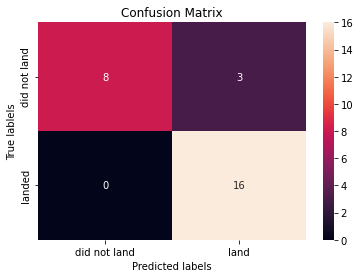

In [63]:
y_pred=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test, y_pred)

In [64]:
tree = DecisionTreeClassifier()

parameters = {"criterion": ["gini", "entropy"], 
              "splitter": ["best", "random"], 
              "max_depth": [2*n for n in range(1,10)],
              "max_features": ["auto", "sqrt"],
              "min_samples_leaf": [1,2,4],
              "min_samples_split": [2, 5, 10]}

tree_cv = GridSearchCV(tree, parameters, cv = 10)

tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [65]:
print("best parameters:", tree_cv.best_params_)
print("accuracy:", tree_cv.best_score_)

best parameters: {'criterion': 'gini', 'max_depth': 18, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}
accuracy: 0.9690476190476189


In [66]:
accu.append(tree_cv.score(X_test,Y_test))
methods.append('decision tree classifier')
tree_cv.score(X_test,Y_test)

0.8518518518518519

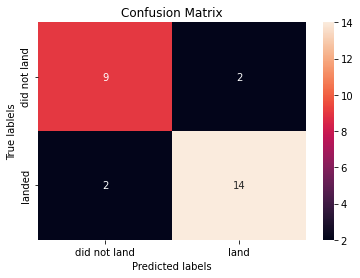

In [67]:
y_pred=tree_cv.predict(X_test)
plot_confusion_matrix(Y_test, y_pred)

In [68]:
knn = KNeighborsClassifier()

parameters = {"n_neighbors": [1,2,3,4,5,6,7,8,9,10],
             "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'],
             "p": [1,2]}

knn_cv = GridSearchCV(knn, parameters, cv=10)

knn_cv.fit(X_test, Y_test)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [69]:
print("best parameters:", knn_cv.best_params_)
print("accuracy:", knn_cv. best_score_)

best parameters: {'algorithm': 'auto', 'n_neighbors': 1, 'p': 1}
accuracy: 0.8833333333333332


In [70]:
accu.append(knn_cv.score(X_test,Y_test))
methods.append('k nearest neighbors')
knn_cv.score(X_test,Y_test)

1.0

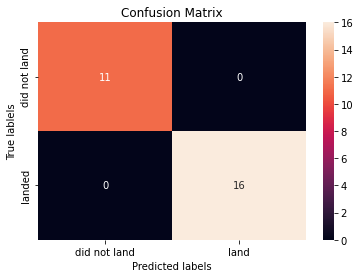

In [71]:
y_pred=knn_cv.predict(X_test)
plot_confusion_matrix(Y_test, y_pred)

In [72]:
print(methods)
print(accu)

['logistic regression', 'support vector machine', 'decision tree classifier', 'k nearest neighbors']
[0.8888888888888888, 0.8888888888888888, 0.8518518518518519, 1.0]


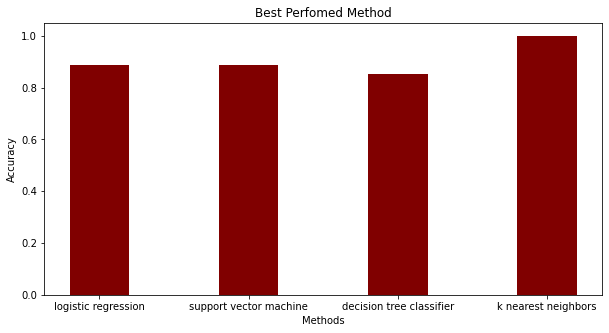

In [73]:
fig = plt.figure(figsize = (10, 5))

plt.bar(methods, accu, color="maroon", width = 0.4)

plt.xlabel("Methods")
plt.ylabel("Accuracy")
plt.title("Best Perfomed Method")
plt.show()

In [75]:
df.to_csv("F:\F\Monogram\Space_X.csv")